# Pandas

## Why Pandas ?

`판다스(Pandas)`를 사용하는 목적은 대표적으로 <b>두 가지</b> 이유가 있다.
- EDA(Exploratory data analysis)
  - 통계값 분석
  - Visualization
- Preprocessing

## What is Pandas ?

쉽게 말하면 `판다스 = 엑셀`이다. 다만 빅데이터를 다룰 때 엑셀로 데이터를 분석하려고 하면 엄청나게 느리고 메모리 리소스도 많이 잡아먹기 때문에 판다스를 사용하면 굉장히 빠르고 간편하게 사용할 수 있다.

- 왜 빠른가?? --> 판다스 역시 NumPy 기반으로 만들어졌기 때문에.

## 판다스 처음 사용해보기

먼저 `pandas`를 임포트한다. 그리고 alias는 <b>관례적</b>으로 `pd`를 사용한다.

In [1]:
import pandas as pd

현재 실습에서 사용하는 판다스 버전은 다음과 같다.

In [2]:
pd.__version__

'0.24.2'

실습에 사용할 데이터는 공공데이터포털에서 제공하는 교통사고 데이터를 가지고 진행하고자 한다. 

<b>공공데이터포털</b>은 [여기](https://www.data.go.kr/)로 들어가서 교통사고 데이터를 다운로드 받은 후에 `csv` 파일을 불러온다.

데이터를 불러올 시, `UnicodeDecodeError` 예외가 발생한다면 가장 먼저 `engine` 인자값에 `python`을 먼저 넣어주고 그 다음에 인코딩을 시도해본다.

In [3]:
data = pd.read_csv('../data/accident01.csv', 
                   engine='python', encoding='cp949')

그럼 불러온 데이터를 한번 확인해보자.

In [4]:
data[:10]

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,01월,103,0,133,23,90,20
1,서울,종로구,02월,84,1,111,20,77,14
2,서울,종로구,03월,101,0,149,34,91,24
3,서울,종로구,04월,93,0,114,27,78,9
4,서울,종로구,05월,102,1,143,24,96,23
5,서울,종로구,06월,96,1,123,32,84,7
6,서울,종로구,07월,89,0,128,28,83,17
7,서울,종로구,08월,90,0,127,29,85,13
8,서울,종로구,09월,91,1,133,24,96,13
9,서울,종로구,10월,113,0,166,30,109,27


불러온 데이터는 `데이터 프레임(DataFrame)` 타입이다.

In [5]:
type(data)

pandas.core.frame.DataFrame

어떤 데이터들이 있는지 한번 확인해본다.

In [6]:
data.values

array([['서울', '종로구', '01월', ..., 23, 90, 20],
       ['서울', '종로구', '02월', ..., 20, 77, 14],
       ['서울', '종로구', '03월', ..., 34, 91, 24],
       ...,
       ['세종', '세종', '10월', ..., 22, 66, 2],
       ['세종', '세종', '11월', ..., 17, 71, 3],
       ['세종', '세종', '12월', ..., 13, 69, 1]], dtype=object)

시도별 평균을 구해본다.

In [7]:
data.groupby('시도').mean()

,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,
강원,34.712963,0.912037,55.194444,12.310185,40.129630,2.754630
경기,143.677419,1.822581,218.209677,45.239247,154.008065,18.962366
경남,53.208333,1.541667,76.175926,26.912037,45.819444,3.444444
경북,50.970803,1.492701,76.346715,21.470803,51.310219,3.565693
광주,124.316667,1.266667,199.616667,24.733333,169.083333,5.800000
대구,137.489583,1.250000,201.375000,43.468750,141.812500,16.093750
대전,125.900000,1.550000,190.533333,33.950000,148.500000,8.083333
부산,62.171875,0.640625,85.770833,23.687500,55.140625,6.942708
서울,129.316667,1.013333,179.170000,37.940000,125.750000,15.480000


---

## Tip. 경로를 모를 경우...

경로를 알기 위해 `os` 패키지에서 path 모듈을 사용한다.

In [8]:
import os

OS마다 표현하는 방식이 다르기 때문에 `os.path.curdir`로 현재 경로를 상대 경로로써 사용할 때 어떤식으로 표현하는지 알아본다.

In [9]:
os.path.curdir

'.'

`os` 패키지에서 `abspath`는 절대 경로를 가져온다. 현재 실습하고 있는 프로젝트의 절대 경로를 얻어온다.

In [10]:
os.path.abspath('.')

'D:\\JISUNG\\00.work\\00.workspace\\jupyter_notebook\\ai'

---

# Seaborn

씨본(seaborn)은 `데이터 시각화(Data Visualization)`를 위한 패키지이다.

씨본은 alias를 <b>관례적</b>으로 `sns`를 사용한다.

In [11]:
import seaborn as sns

### tips 데이터로 분석해보기

간단한 실습을 위해 씨본에서 `Tidy-data`를 불러오는데, 데이터는 `tips` 데이터를 사용하고자 한다.

In [12]:
tips = sns.load_dataset('tips')

불러온 데이터가 어떤식으로 되어있는지 살펴본다.

In [13]:
tips.shape

(244, 7)

In [14]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

불러온 데이터가 어떤식으로 구성되어 있는지 알기 위해서 NumPy처럼 위와 같이 `shape`와 `dtypes`를 사용할 수도 있지만, 판다스에서는 훨씬 더 많은 것들을 제공한다.

# Pandas 데이터 분석 - 5총사

## info

판다스에서는 다음과 같이 `info()` 메소드를 사용한다.

결과의 `RangeIndex`란 판다스가 알아서 데이터에 인덱스를 붙여주는데, 이를 의미한다.

In [15]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [16]:
tips.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Columns: 7 entries, total_bill to size
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


## describe

통계값을 보기 위해서는 다음과 같이 `describe()` 메소드를 사용한다.

`describe`는 기본적으로 숫자로 이루어진 데이터들에 대한 통계를 보여준다.

In [17]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


`category` 데이터에 한정해서 빈도수 등을 알아보고자 할 때, 다음과 같이 `include`에 인자값을 넣어준다.

In [18]:
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


`float` 데이터에 대해 알아보고 싶다면 다음과 같이 `float`를 넣어준다.

In [19]:
tips.describe(include='float')

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


`int` 데이터도 마찬가지다.

In [20]:
tips.describe(include='int64')

,size
count,244.000000
mean,2.569672
std,0.951100
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,6.000000


여러 데이터들을 알고 싶을 때, 다음과 같이 리스트 형태로 넣어준다.

In [21]:
tips.describe(include=['int64', 'category'])

,sex,smoker,day,time,size
count,244,244,244,244,244.000000
unique,2,2,4,2,NaN
top,Male,No,Sat,Dinner,NaN
freq,157,151,87,176,NaN
mean,NaN,NaN,NaN,NaN,2.569672
std,NaN,NaN,NaN,NaN,0.951100
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,3.000000


## head

`head`는 가장 앞에서부터 5개까지 데이터를 보여준다.

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


첫번째 인자값으로 가져오고 싶은 데이터의 개수를 입력해줄 수 있다.

In [23]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## tail

`tail`은 가장 뒤에서부터 5개까지 데이터를 보여준다.

In [24]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [25]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## sample

`sample`은 랜덤하게 데이터를 하나 뽑아서 보여준다.

In [26]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
113,23.95,2.55,Male,No,Sun,Dinner,2


마찬가지로 개수를 정해줄 수 있다. 물론 랜덤하게 가져온다.

In [27]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
53,9.94,1.56,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
68,20.23,2.01,Male,No,Sat,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2


---

## 다시 교통사고 데이터로..

이제 실제로 교통사고 데이터를 가지고 분석을 시도해본다.

먼저, 데이터를 불러온다.

In [28]:
data = pd.read_csv('../data/accident01.csv', engine='python', encoding='cp949')

불러온 데이터를 앞서 언급했던 <b>5총사: info, describe, head, tail, sample</b>로 확인해본다.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 9 columns):
시도      2745 non-null object
시군구     2745 non-null object
월       2745 non-null object
발생건수    2745 non-null int64
사망자수    2745 non-null int64
부상자수    2745 non-null int64
중상      2745 non-null int64
경상      2745 non-null int64
부상신고    2745 non-null int64
dtypes: int64(6), object(3)
memory usage: 193.1+ KB


In [30]:
data.describe(include='all')

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
count,2745,2745,2745,2745.00000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
unique,17,206,12,NaN,NaN,NaN,NaN,NaN,NaN
top,경기,중구,06월,NaN,NaN,NaN,NaN,NaN,NaN
freq,372,72,229,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,79.10674,1.377413,117.681967,27.052095,82.881967,7.747905
std,NaN,NaN,NaN,77.92157,1.553821,117.356238,24.090962,87.130782,10.627361
min,NaN,NaN,NaN,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,21.00000,0.000000,32.000000,10.000000,20.000000,1.000000
50%,NaN,NaN,NaN,57.00000,1.000000,84.000000,21.000000,55.000000,4.000000
75%,NaN,NaN,NaN,107.00000,2.000000,155.000000,36.000000,109.000000,11.000000


In [31]:
data.describe(include='object')

,시도,시군구,월
count,2745,2745,2745
unique,17,206,12
top,경기,중구,06월
freq,372,72,229


In [32]:
data.sample(5)

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
226,서울,서초구,11월,223,2,337,66,247,24
1160,충북,진천군,09월,47,2,99,28,68,3
168,서울,관악구,01월,102,1,130,27,91,12
994,강원,평창군,11월,14,2,20,3,17,0
2693,울산,남구,09월,99,3,157,52,99,6


In [33]:
data.head()

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,01월,103,0,133,23,90,20
1,서울,종로구,02월,84,1,111,20,77,14
2,서울,종로구,03월,101,0,149,34,91,24
3,서울,종로구,04월,93,0,114,27,78,9
4,서울,종로구,05월,102,1,143,24,96,23


In [34]:
data.tail()

,시도,시군구,월,발생건수,사망자수,부상자수,중상,경상,부상신고
2740,세종,세종,08월,52,1,85,26,58,1
2741,세종,세종,09월,50,4,61,14,46,1
2742,세종,세종,10월,65,0,90,22,66,2
2743,세종,세종,11월,65,0,91,17,71,3
2744,세종,세종,12월,57,0,83,13,69,1


## 원하는 dtype만 가져오기

원하는 타입만 가져오고 싶을 때, `select_dtypes`로 불러올 수 있다.

In [35]:
data.select_dtypes('object')[:5]

,시도,시군구,월
0,서울,종로구,01월
1,서울,종로구,02월
2,서울,종로구,03월
3,서울,종로구,04월
4,서울,종로구,05월


tips 데이터도 마찬가지.

In [36]:
tips.select_dtypes('category')[:5]

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


시·도별 평균 데이터를 알고싶을 때는 다음과 같이 그룹화해본다. 그룹화 할 때는 `groupby`를 이용하는데, 설명은 밑에서 다루고자 한다.

In [37]:
data.groupby('시도').mean()[:10]

,발생건수,사망자수,부상자수,중상,경상,부상신고
시도,,,,,,
강원,34.712963,0.912037,55.194444,12.310185,40.129630,2.754630
경기,143.677419,1.822581,218.209677,45.239247,154.008065,18.962366
경남,53.208333,1.541667,76.175926,26.912037,45.819444,3.444444
경북,50.970803,1.492701,76.346715,21.470803,51.310219,3.565693
광주,124.316667,1.266667,199.616667,24.733333,169.083333,5.800000
대구,137.489583,1.250000,201.375000,43.468750,141.812500,16.093750
대전,125.900000,1.550000,190.533333,33.950000,148.500000,8.083333
부산,62.171875,0.640625,85.770833,23.687500,55.140625,6.942708
서울,129.316667,1.013333,179.170000,37.940000,125.750000,15.480000


---

## 다시 tips 데이터로..

## indexing

`DataFrame`에서 인덱싱을 하는 방법은 여러 가지가 있다. 그 중 `iloc`를 사용해서 인덱싱하는 방법이 있다.

In [38]:
tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


행과 열을 범위로 가져오고 싶을 때, `NumPy`의 `ix_`처럼 사용하는 것도 가능하다.

In [39]:
tips.iloc[:5, :2]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


인덱싱을 통해서 데이터를 바꿀 수 있다.

In [40]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [41]:
tips.iloc[0, 0]

16.99

`tips` 데이터의 가장 첫번째 행의 `total_bill`은 `16.99`이다. 이를 `18.99`로 바꿔본다.

In [42]:
tips.iloc[0, 0] = 18.99

확인해보면 값이 바뀐 것을 알 수 있다.

In [43]:
tips.iloc[0, 0]

18.99

In [44]:
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,18.99,1.01,Female,No,Sun,Dinner,2


## groupby

각 데이터를 그룹화시켜 분석하기 위해 사용한다.

성별과 팁에 대한 상관 관계를 알아보자.

In [45]:
x = tips.groupby('sex').mean()

In [46]:
x

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.079885,2.833448,2.459770


각 데이터를 `Series` 타입으로 불러본다.

In [47]:
x.tip

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [48]:
x.total_bill

sex
Male      20.744076
Female    18.079885
Name: total_bill, dtype: float64

그룹에서 `tip`과 `total bill`의 비율을 가지는 새로운 행 `ratio`를 추가한 후 확인해본다.

In [49]:
x['ratio'] = x.tip / x.total_bill

In [50]:
x

,total_bill,tip,size,ratio
sex,,,,
Male,20.744076,3.089618,2.630573,0.148940
Female,18.079885,2.833448,2.459770,0.156718


여러 데이터를 한번에 그룹화할 때는 리스트안에 컬럼명을 넣어준다.

In [51]:
groups = tips.groupby(['tip', 'sex'])

In [52]:
groups.mean()[:5]

total_bill      size
tip  sex                         
1.00 Male     12.600000  2.000000
     Female    5.356667  1.333333
1.01 Male           NaN       NaN
     Female   18.990000  2.000000
1.10 Male           NaN       NaN

In [53]:
groups = tips.groupby(['sex', 'day'])

In [54]:
groups.mean()[:10]

total_bill       tip      size
sex    day                                 
Male   Thur   18.714667  2.980333  2.433333
       Fri    19.857000  2.693000  2.100000
       Sat    20.802542  3.083898  2.644068
       Sun    21.887241  3.220345  2.810345
Female Thur   16.715312  2.575625  2.468750
       Fri    14.145556  2.781111  2.111111
       Sat    19.680357  2.801786  2.250000
       Sun    19.983333  3.367222  2.944444

## Fancy indexing

판다스는 NumPy 기반으로 만들어졌기 때문에 `팬시 인덱싱(Fancy indexing)`이 가능하다.

In [55]:
groups[['tip']].mean()

tip
sex    day           
Male   Thur  2.980333
       Fri   2.693000
       Sat   3.083898
       Sun   3.220345
Female Thur  2.575625
       Fri   2.781111
       Sat   2.801786
       Sun   3.367222

In [56]:
tips.iloc[:10][['tip', 'total_bill']]

,tip,total_bill
0,1.01,18.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59
5,4.71,25.29
6,2.00,8.77
7,3.12,26.88
8,1.96,15.04
9,3.23,14.78


## 데이터를 저장할 때...

저장하고 싶은 형식에 맞춰 `to_`가 붙은 메소드를 사용한다.

In [57]:
[method for method in dir(pd.DataFrame) if 'to_' in method]

['_to_dict_of_blocks',
 'to_clipboard',
 'to_csv',
 'to_dense',
 'to_dict',
 'to_excel',
 'to_feather',
 'to_gbq',
 'to_hdf',
 'to_html',
 'to_json',
 'to_latex',
 'to_msgpack',
 'to_numpy',
 'to_panel',
 'to_parquet',
 'to_period',
 'to_pickle',
 'to_records',
 'to_sparse',
 'to_sql',
 'to_stata',
 'to_string',
 'to_timestamp',
 'to_xarray']

In [58]:
tips.to_csv('tips.csv')

In [59]:
pd.read_csv('tips.csv').iloc[:10, 1:]

,total_bill,tip,sex,smoker,day,time,size
0,18.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


---

# Visualization

불러온 데이터를 알아보기 쉽게 시각화해본다. 

시각화를 해주기 위해 먼저 `matplotlib`을 임포트 해야한다.

`matplotlib`은 데이터 시각화를 위한 패키지이다.

In [60]:
import matplotlib.pyplot as plt

몽키 패칭을 통해 판다스 데이터 프레임의 데이터를 시각화할 수 있도록 해준다.

다음과 같이 바 그래프를 그려본다.

In [61]:
%matplotlib inline

만약 브라우저 상에서 그래프가 보이지 않을 경우, 위의 키워드를 입력해준다.

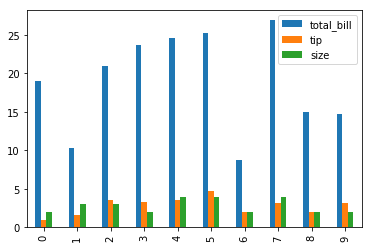

In [62]:
tips.iloc[:10].plot.bar()

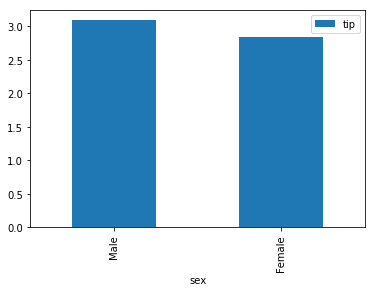

In [63]:
tips.groupby('sex').mean()[['tip']].plot.bar()

---

# 미세먼지 데이터로 분석해보기

공공데이터포탈에서 미세먼지 데이터를 받은 후 분석을 시도해본다.

In [64]:
dust = pd.read_csv('../data/dust.csv')

In [65]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
측정일시         597 non-null int64
측정소명         597 non-null object
미세먼지(㎍/㎥)    597 non-null int64
dtypes: int64(2), object(1)
memory usage: 14.1+ KB


위에서 확인해보면 `측정일시`에 해당하는 데이터 타입이 `int`라고 되어있다.

In [66]:
dust['측정일시'][:10]

0    20180710
1    20180711
2    20180712
3    20180713
4    20180716
5    20180717
6    20180718
7    20180719
8    20180720
9    20180721
Name: 측정일시, dtype: int64

날짜 데이터는 시간에 관한 데이터이므로, `시계열` 형식으로 바꿔주어야 한다.

아래와 같이 `to_datetime`으로 시계열로 바꾸어준다.

In [67]:
dust['date'] = pd.to_datetime(dust['측정일시'], format='%Y%m%d')

`date`라는 컬럼을 새로 추가한 후, 시계열 데이터를 만들었다.

In [68]:
dust.columns

Index(['측정일시', '측정소명', '미세먼지(㎍/㎥)', 'date'], dtype='object')

In [69]:
dust.head()

,측정일시,측정소명,미세먼지(㎍/㎥),date
0,20180710,관악구,24,2018-07-10
1,20180711,관악구,28,2018-07-11
2,20180712,관악구,25,2018-07-12
3,20180713,관악구,22,2018-07-13
4,20180716,관악구,28,2018-07-16


미세먼지 평균 농도로 월·일별 그래프를 그려본다.

In [70]:
month = dust.set_index('date')[dust.columns[2]].resample('M')

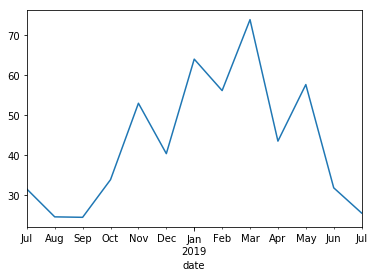

In [71]:
month.mean().plot.line()

In [72]:
day = dust.set_index('date')[dust.columns[2]].resample('D')

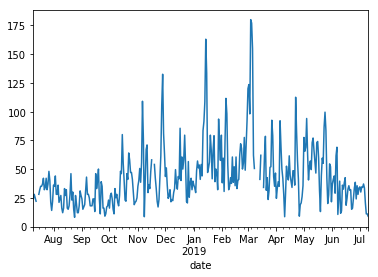

In [73]:
day.mean().plot.line()

---

`pandas`의 자료형에는 `숫자(int, float)`, `문자(object, category)`, `날짜(date)`가 있다.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

실습을 위해서 만만한 `tips` 데이터를 불러온다.

In [75]:
tips = sns.load_dataset('tips')

`info`를 통해 살펴보면 `memory usage`라는 것이 있다. `memory useage`란, 메모리 상에 데이터를 올리고 큰 데이터의 경우 분산처리를 하여 올린다.

In [76]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


`corr` 메소드는 상관분석(correlation)을 의미한다.

In [77]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


이에 대한 `heatmap`을 그려본다.

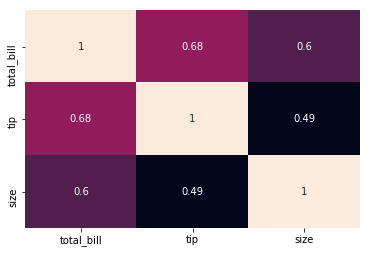

In [78]:
sns.heatmap(tips.corr(), cbar=False, annot=True)

흡연자 중에서 남자와 여자의 수를 알고 싶을 때, 다음과 같이 `value_counts`를 사용한다.

In [79]:
tips[tips.smoker == 'Yes'].sex.value_counts()

Male      60
Female    33
Name: sex, dtype: int64

이에 대한 그래프를 그려보면 다음과 같다.

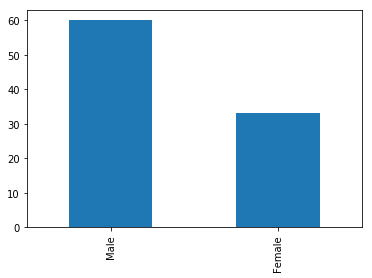

In [80]:
tips[tips.smoker == 'Yes'].sex.value_counts().plot.bar()

`팬시 인덱싱`으로 다음과 같이 뽑아올 수도 있다.

In [81]:
tips[tips.smoker == 'Yes'][['sex', 'smoker']].sample(5)

,sex,smoker
56,Male,Yes
211,Male,Yes
138,Male,Yes
98,Male,Yes
194,Male,Yes


`iteritems`를 통해 제너레이터를 생성하여 `next` 함수로 순회할 수 있다. `DataFrame` 객체의 `iteritems`를 불러오면 각 컬럼에 대한 열(row)을 가져온다.

In [82]:
iter_ = tips.iteritems()

In [83]:
next_ = next(iter_)

In [84]:
next_[0]

'total_bill'

In [85]:
next_[1][:10]

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
5    25.29
6     8.77
7    26.88
8    15.04
9    14.78
Name: total_bill, dtype: float64

행으로 가져오고 싶을 때는 `iterrows`로 가져올 수 있다.

In [86]:
next(tips.iterrows())

(0, total_bill     16.99
 tip             1.01
 sex           Female
 smoker            No
 day              Sun
 time          Dinner
 size               2
 Name: 0, dtype: object)

## vincent

```python
!pip install vincent
```

In [87]:
tips[['total_bill', 'smoker']].set_index('smoker')

,total_bill
smoker,
No,16.99
No,10.34
No,21.01
No,23.68
No,24.59
No,25.29
No,8.77
No,26.88
No,15.04


In [88]:
x = tips[['total_bill', 'smoker']]. groupby('smoker')
x.mean()

,total_bill
smoker,
Yes,20.756344
No,19.188278


In [89]:
s = tips.groupby('smoker').mean().total_bill

## pdvega

```python
!pip install -q pdvega
```

In [90]:
import pdvega

에러 메세지를 없애고 싶은 경우 아래 코드를 사용한다.

```python
import warnings
warnigs.filterwarnings('ignore')
```

D:\JISUNG\01.Anaconda\lib\site-packages\pdvega\_core.py:177: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[x], ordinal_threshold=50)
D:\JISUNG\01.Anaconda\lib\site-packages\pdvega\_core.py:181: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  "type": infer_vegalite_type(df[y], ordinal_threshold=0)


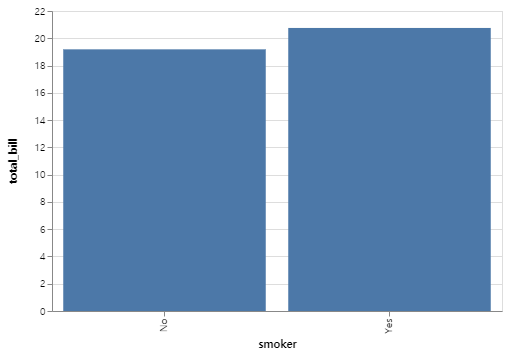

In [91]:
s.vgplot.bar()

In [92]:
tips.pivot_table(index='smoker', columns='sex', aggfunc=np.sum, margins=True)

size                 tip                 total_bill                  
sex    Male Female  All    Male  Female     All       Male   Female      All
smoker                                                                      
Yes     150     74  224  183.07   96.74  279.81    1337.07   593.27  1930.34
No      263    140  403  302.00  149.77  451.77    1919.75   977.68  2897.43
All     413    214  627  485.07  246.51  731.58    3256.82  1570.95  4827.77

In [93]:
pd.crosstab([tips.smoker, tips.sex], tips.time, values=tips.tip, aggfunc=np.mean)

time              Lunch    Dinner
smoker sex                       
Yes    Male    2.790769  3.123191
       Female  2.891000  2.949130
No     Male    2.941500  3.158052
       Female  2.459600  3.044138

In [94]:
pd.crosstab([tips.smoker, tips.sex], tips.time, values=tips.tip, aggfunc=np.mean).index

MultiIndex(levels=[['Yes', 'No'], ['Male', 'Female']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['smoker', 'sex'])

## reset index

In [95]:
x = tips[tips.sex == 'Male'].loc[:15]

In [96]:
x.reset_index(drop=True)

,total_bill,tip,sex,smoker,day,time,size
0,10.34,1.66,Male,No,Sun,Dinner,3
1,21.01,3.50,Male,No,Sun,Dinner,3
2,23.68,3.31,Male,No,Sun,Dinner,2
3,25.29,4.71,Male,No,Sun,Dinner,4
4,8.77,2.00,Male,No,Sun,Dinner,2
5,26.88,3.12,Male,No,Sun,Dinner,4
6,15.04,1.96,Male,No,Sun,Dinner,2
7,14.78,3.23,Male,No,Sun,Dinner,2
8,10.27,1.71,Male,No,Sun,Dinner,2
9,15.42,1.57,Male,No,Sun,Dinner,2


In [97]:
tips.groupby(['sex', 'smoker']).mean()[['tip']]

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

## stack and unstack

In [98]:
group = tips.groupby(['sex', 'smoker']).mean()

In [99]:
group[['tip']].unstack()

tip          
smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519

In [100]:
group[['tip']].stack()

sex     smoker     
Male    Yes     tip    3.051167
        No      tip    3.113402
Female  Yes     tip    2.931515
        No      tip    2.773519
dtype: float64

In [101]:
tips.groupby('sex').mean()[['tip']].unstack()

     sex   
tip  Male      3.089618
     Female    2.833448
dtype: float64

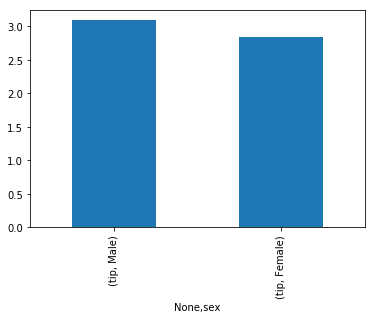

In [102]:
tips.groupby('sex').mean()[['tip']].unstack().plot.bar()

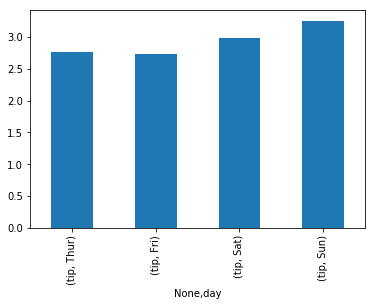

In [103]:
tips.groupby('day').mean()[['tip']].unstack().plot.bar(stacked=False)

In [104]:
group = tips.groupby(['day', 'sex']).mean()

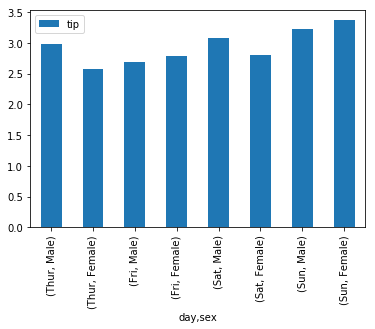

In [105]:
group[['tip']].plot.bar()

In [106]:
group[['tip']].unstack()

tip          
sex       Male    Female
day                     
Thur  2.980333  2.575625
Fri   2.693000  2.781111
Sat   3.083898  2.801786
Sun   3.220345  3.367222

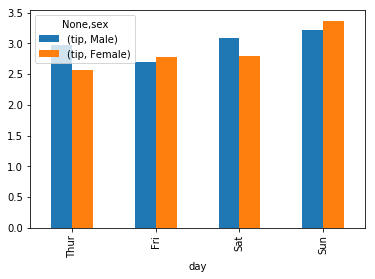

In [107]:
group[['tip']].unstack().plot.bar()

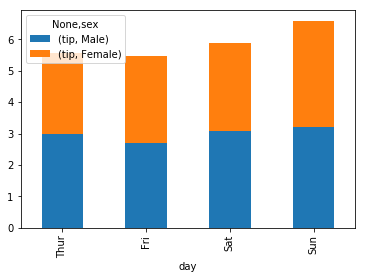

In [108]:
group[['tip']].unstack().plot.bar(stacked=True)

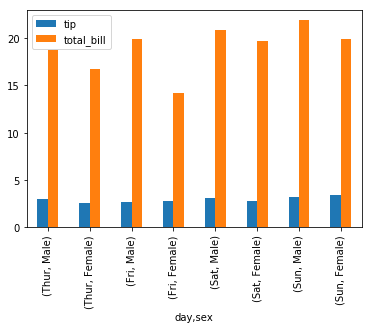

In [109]:
group[['tip','total_bill']].plot.bar()

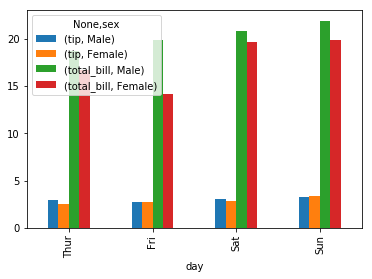

In [110]:
group[['tip','total_bill']].unstack().plot.bar()

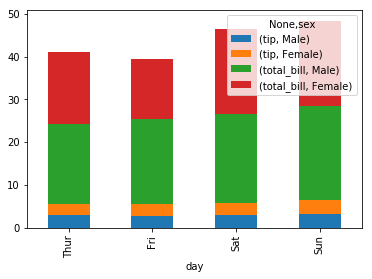

In [111]:
group[['tip','total_bill']].unstack().plot.bar(stacked=True)

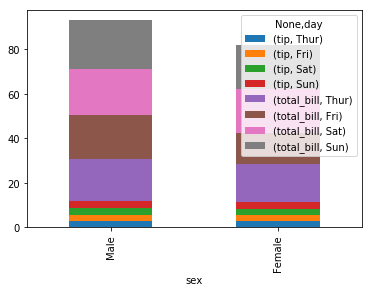

In [112]:
group[['tip','total_bill']].unstack(0).plot.bar(stacked=True)

---

이번에는 `titanic` 데이터로 데이터 분석을 진행하고자 한다.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mino
import matplotlib.font_manager as fm
fm.rcParams['font.family'] = 'NanumMyeongjo'

In [2]:
titanic = sns.load_dataset('titanic')

불러온 데이터에 missing value가 있는 것을 확인할 수 있다.

D:\JISUNG\01.Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
D:\JISUNG\01.Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
D:\JISUNG\01.Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumMyeongjo'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


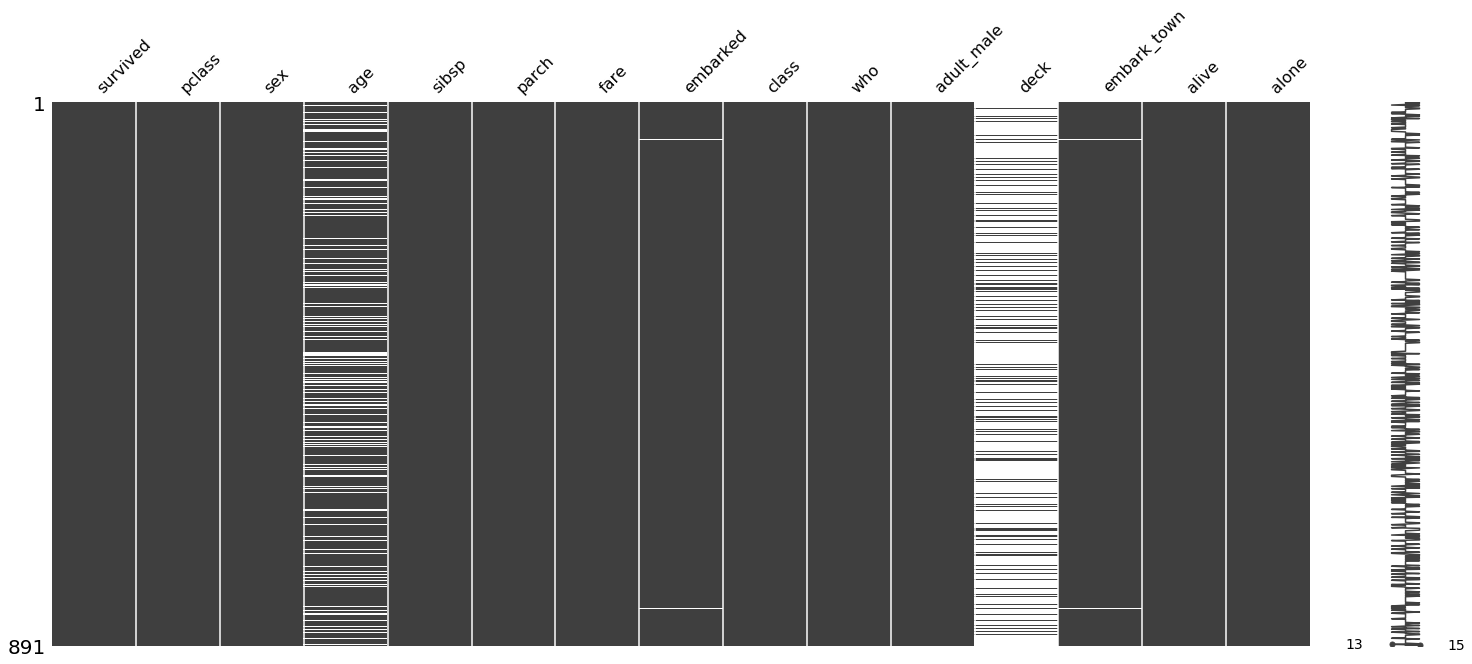

In [3]:
%matplotlib inline
mino.matrix(titanic)

titanic 데이터에 대한 정보를 살펴보면 다음과 같다.

In [5]:
!pip install pandas_profiling

  Stored in directory: C:\Users\ParkJS\AppData\Local\pip\Cache\wheels\45\10\b5\5565b02c204a3bb87490a22e0e4c382ea06337bb79fd74d58a
  Stored in directory: C:\Users\ParkJS\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\ParkJS\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


In [6]:
import pandas_profiling as pp
pp.ProfileReport(titanic)

missing value를 fillna를 통해 평균값으로 대체시킨다.

In [7]:
titanic.fillna(method='bfill', inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           890 non-null category
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


sex와 class 간 생존 여부를 분석해본다.

In [8]:
group = titanic.groupby(['sex','class']).survived
total = group.sum()

In [9]:
total

sex     class 
female  First     91
        Second    70
        Third     72
male    First     45
        Second    17
        Third     47
Name: survived, dtype: int64

In [10]:
total.unstack()

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


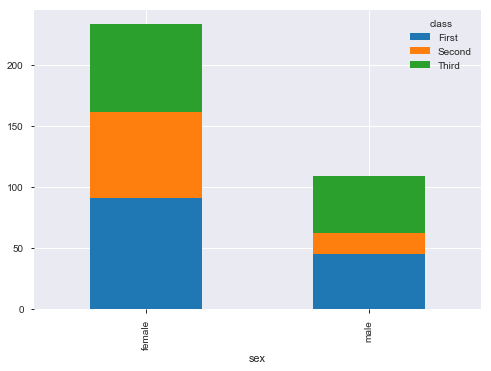

In [11]:
total.unstack().plot.bar(stacked=True)

In [12]:
titanic.embarked.value_counts()

S    645
C    169
Q     77
Name: embarked, dtype: int64

In [13]:
titanic.embarked.map({'S':0,'C':1,'Q':2})

0      0
1      1
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      1
10     0
11     0
12     0
13     0
14     0
15     0
16     2
17     0
18     0
19     1
20     0
21     0
22     2
23     0
24     0
25     0
26     1
27     0
28     2
29     0
      ..
861    0
862    0
863    0
864    0
865    0
866    1
867    0
868    0
869    0
870    0
871    0
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    0
881    0
882    0
883    0
884    0
885    2
886    0
887    0
888    0
889    1
890    2
Name: embarked, Length: 891, dtype: int64

In [14]:
titanic.pivot_table('survived','sex',aggfunc=sum)

,survived
sex,
female,233
male,109


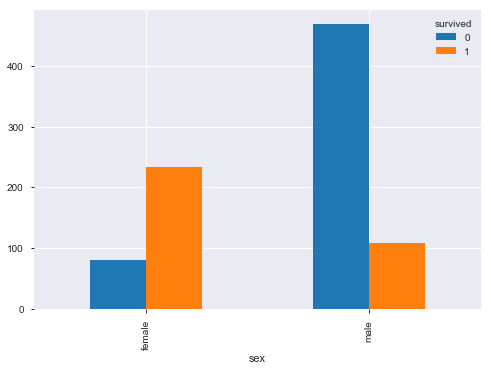

In [15]:
table = pd.crosstab(titanic.sex, titanic.survived)
table.plot.bar()

In [16]:
table.stack()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [17]:
table.unstack()

survived  sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [18]:
survived_group = titanic.groupby(['sex','survived'])
total = survived_group.sum().unstack()
total

pclass            age          sibsp      parch             fare  \
survived      0    1         0        1     0    1     0    1           0   
sex                                                                         
female      231  447   2112.00  6886.42    98  120    84  120   1864.9752   
male       1159  220  14637.83  2978.42   206   42    97   39  10277.7447   

                     adult_male        alone        
survived           1          0     1      0     1  
sex                                                 
female    12101.6876        0.0   0.0   27.0  99.0  
male       4449.5418      449.0  88.0  347.0  64.0

In [19]:
total.stack()

pclass       age  sibsp  parch        fare  adult_male  alone
sex    survived                                                               
female 0            231   2112.00     98     84   1864.9752         0.0   27.0
       1            447   6886.42    120    120  12101.6876         0.0   99.0
male   0           1159  14637.83    206     97  10277.7447       449.0  347.0
       1            220   2978.42     42     39   4449.5418        88.0   64.0

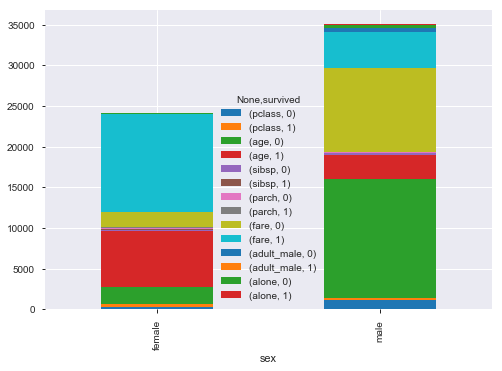

In [20]:
total.plot.bar(stacked=True)